# Monte Carlo Options Pricer

- $S_{0}$ - Initial stock price
- $K$ - strike price
- $T$ - time to maturity (years)
- $r$ - risk-free rate
- $\sigma$ - volatility

## Geometric Brownian Motion
- $S_{t}=S_{0}\exp \left(\left(\mu -{\frac {\sigma ^{2}}{2}}\right)t+\sigma W_{t}\right)$

Estimated European Call Option Price: $8.12


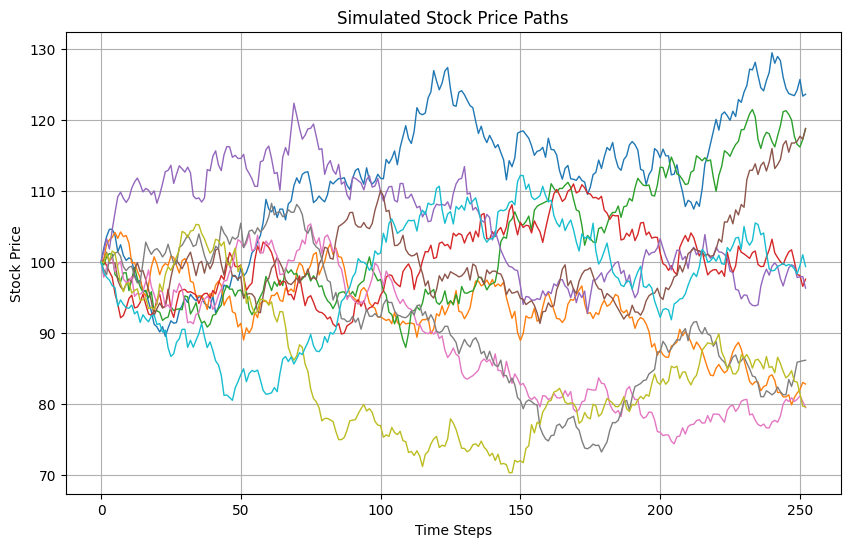

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Setup Parameters
S0 = 100    # Initial stock price
K = 105     # Strike price
T = 1.0     # Time to maturity in years
r = 0.05    # Risk-free rate
sigma = 0.2 # Volatility
n_simulations = 10000  # Number of simulations
n_steps = 252          # Number of time steps (trading days in a year)

# Step 3: Simulate Stock Price Paths
dt = T / n_steps
stock_paths = np.zeros((n_simulations, n_steps + 1))
stock_paths[:, 0] = S0

for t in range(1, n_steps + 1):
    z = np.random.standard_normal(n_simulations)
    stock_paths[:, t] = stock_paths[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

# Step 4: Calculate Payoff for Each Path
payoffs = np.maximum(stock_paths[:, -1] - K, 0)

# Step 5: Discount Payoffs to Present Value
discounted_payoffs = np.exp(-r * T) * payoffs

# Step 6: Estimate Option Price
option_price = np.mean(discounted_payoffs)

print(f"Estimated European Call Option Price: ${option_price:.2f}")

# Plotting the first 10 simulated paths
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(stock_paths[i, :], lw=1)
plt.title('Simulated Stock Price Paths')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')


plt.grid(True)
plt.show()
